In [2]:
import sys,os,os.path

sys.path.append("../../")   # cite IC from parent directory
                            # NOTE if you can't import IC stuff, its because of the
                            # above line
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import tables as tb
import IC.invisible_cities.io.dst_io                           as     dstio
import IC.invisible_cities.io.mcinfo_io as mcio
from    IC.invisible_cities.core.core_functions   import shift_to_bin_centers
import iminuit,probfit

import scipy.special as special
from scipy.stats import skewnorm
from scipy.optimize import curve_fit

from scipy.integrate import quad



#adding here ROI
emin = 1.5
emax = 1.7

### Plot efficiency neatly here
include errors, plot them one over the other for the different types

In [3]:
# read efficiency file in first
efficiency = pd.read_csv('../isaura_study_FOM/efficiency_study_tables/10x10x10mm_Port_1a.csv')
display(efficiency)

,Unnamed: 0,Cut,Relative Efficiency,Relative Events,Single Cut Efficiency
0,0,No cuts,100.000000,100009,100.000000
1,1,low E cuts,54.859063,54864,54.859063
2,2,Fiducial Cuts,71.742855,39361,66.848984
3,3,One track cut,49.851376,19622,25.303723
4,4,Blob overlap cuts,56.105392,11009,55.129038
5,5,Energy cuts,14.115723,1554,6.584407


In [7]:
efficiency['Cut'].to_numpy()

array(['No cuts', 'low E cuts', 'Fiducial Cuts', 'One track cut',
       'Blob overlap cuts', 'Energy cuts'], dtype=object)

In [71]:
def pd_to_plot(data, plot = True):
    '''
    Read in pandas dataframe and convert to histogram-able data :)
    '''

    cut_positions = data['Cut'].to_numpy()
    max_events = (data['Relative Events'].to_numpy())[0]
    events = data['Relative Events'].to_numpy()
    
    # absolute efficiency
    efficiency_values = 100*(data['Relative Events'].to_numpy())/max_events

    sqrt_max = np.sqrt(max_events)
    sqrt_evn = np.sqrt(events)

    errors = ratio_error(efficiency_values, events, max_events, sqrt_evn, sqrt_max)
    print(errors)

    if (plot==True):
        plt.errorbar(cut_positions, efficiency_values, yerr = errors, fmt = 'o')
        plt.xticks(rotation=45, ha='right')
        
        plt.show()

    return (cut_positions, efficiency_values, errors)

In [72]:
def ratio_error(f, a, b, a_error, b_error):
    '''
    Error multiplication via quadrature

    f - efficiency (%)
    a - events post-cut
    b - total events
    a_error - sqrt of events post-cut
    b_error - sqrt of total events
    '''
    f_error = f*np.sqrt((a_error/a)**2
                                  +(b_error/b)**2)
    return f_error

[0.44719347 0.29145597 0.23418501 0.15319157 0.1105381  0.03972232]


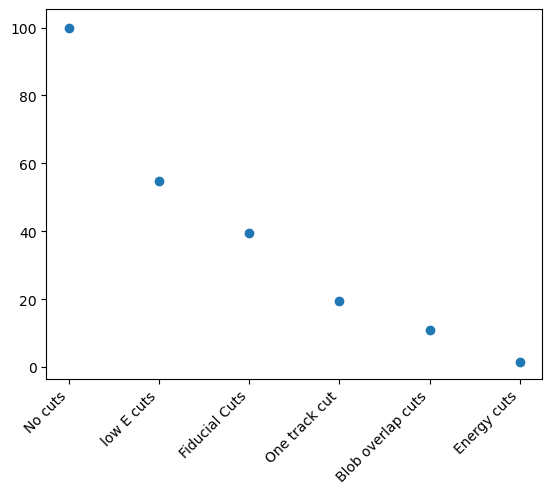

In [73]:
info = pd_to_plot(efficiency)

[0.4575138  0.31653081 0.25015567 0.16719022 0.12187733 0.04217259]


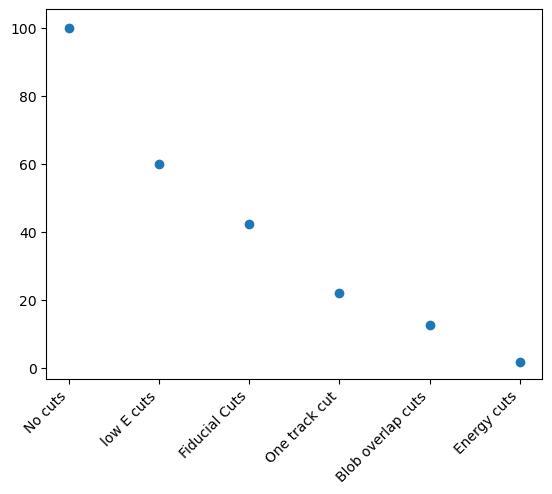

[0.44719347 0.29145597 0.23418501 0.15319157 0.1105381  0.03972232]


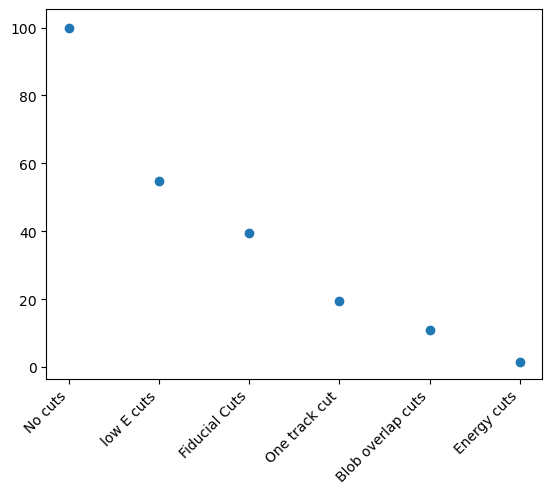

[0.45777978 0.27315094 0.22121772 0.14364309 0.10287706 0.03654015]


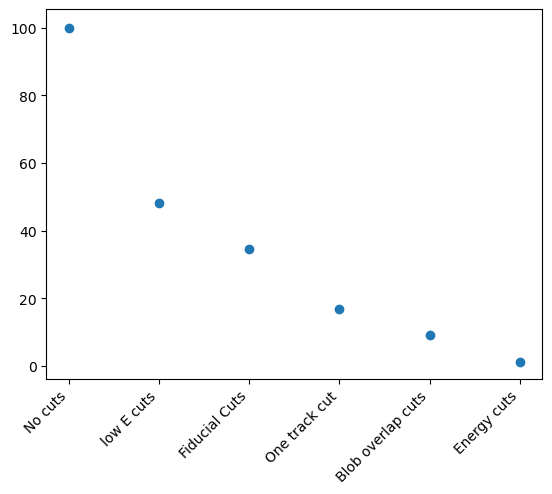

[0.53059172 0.30776641 0.2513809  0.16669857 0.12086289 0.04325429]


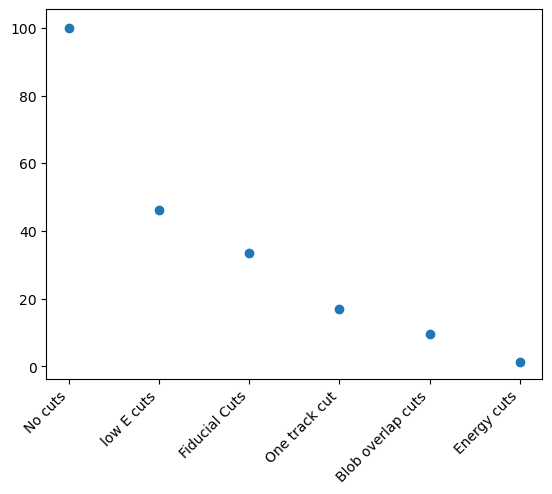

In [74]:
# Create list to scrape this info
folder_path = '../isaura_study_FOM/efficiency_study_tables/10x10x10/'

file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

lgnd_tits = []
efficiency_data = []
errors = []

for file in file_names:

    loc = folder_path + file
    info = pd.read_csv(loc)
    # scrape names
    name_short = ((loc.split("/"))[-1])[:-4]
    lgnd_tits.append(name_short)
    # collect data
    info = pd_to_plot(info)
    # cut names
    efficiency_xlabels = info[0]
    # collect data
    efficiency_data.append(info[1])

    errors.append(info[2])

    

In [75]:
print(efficiency_data[0])
print(lgnd_tits)
print(efficiency_xlabels)

[100.          59.87775778  42.0825135   21.9083602   12.60413614
   1.67141123]
['Port_1b', 'Port_1a', 'Port_2b', 'Port_2a']
['No cuts' 'low E cuts' 'Fiducial Cuts' 'One track cut'
 'Blob overlap cuts' 'Energy cuts']


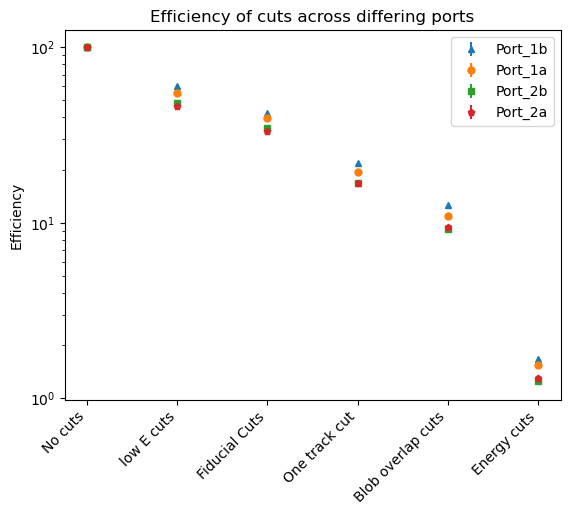

In [92]:
marker_shapes = ['^', 'o', 's', 'p']
for i in range(len(efficiency_data)):
    plt.errorbar(efficiency_xlabels, efficiency_data[i], yerr = errors[i], label = lgnd_tits[i], fmt = marker_shapes[i], markersize = 5)
    
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.title("Efficiency of cuts across differing ports")
plt.ylabel("Efficiency")
plt.legend()
plt.show()


# use this error function provided by helena

In [55]:
def ratio_error(f, a, b, a_error, b_error):
    '''
    Error multiplication via quadrature

    f - efficiency (%)
    a - events post-cut
    b - total events
    a_error - sqrt of events post-cut
    b_error - sqrt of total events
    '''
    f_error = f*math.sqrt((a_error/a)**2
                                  +(b_error/b)**2)
    return f_error

In [56]:
print(efficiency_data[0])
print(efficiency_data[0][0])

[100.          59.87775778  42.0825135   21.9083602   12.60413614
   1.67141123]
100.0
